<a href="https://colab.research.google.com/github/Desmyk/ADVMachineLearning/blob/main/CapstoneADVML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install quandl

In [56]:
# import necessary libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
# Dataset Extraction

data = yf.download('AAPL', start='2020-01-01', end='2024-02-25')

[*********************100%***********************]  1 of 1 completed


In [11]:
# Convert the yfinance to a df (Load Dataset)
data = pd.DataFrame(data)

In [12]:
# check data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876129,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742668,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400551,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


# **DATA PRE_PROCESSING**

In [14]:
# Check the shape of the data
data.shape

(1043, 6)

In [15]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2020-01-02 to 2024-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1043 non-null   float64
 1   High       1043 non-null   float64
 2   Low        1043 non-null   float64
 3   Close      1043 non-null   float64
 4   Adj Close  1043 non-null   float64
 5   Volume     1043 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 57.0 KB


In [13]:

# check for missing values
data.isnull().sum()
# no missing values

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [16]:
# Lets scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
# Training, validation and testing
X = data.drop(['Close'], axis=1)
y = data['Close']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

## **FEATURE ENGINEERING**

In [20]:
#Extract technical indicators like :

# Simple Moving Average
data['SMA'] = data['Close'].rolling(window=20). mean()
# Exponential MA
data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
# Relative Strength Index
data['RSI'] = data['Close'].rolling(window=14).apply(lambda x: np.mean(x[x > x.mean()]) / np.mean(x[x < x.mean()]))
# Bollinger Bands
data['Bollinger Upper'] = data['Close'].rolling(window=20).mean() + 2*data['Close'].rolling(window=20).std()
data['Bollinger Lower'] = data['Close'].rolling(window=20).mean() - 2*data['Close'].rolling(window=20).std()

**MODEL TRAINING**

SO HERE, WE'LL USE DIFFERENT MODELS FOR TRAINING

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Create a list of models
models = [RandomForestRegressor(), GradientBoostingRegressor(), LinearRegression()]

# Train each model on the training data
for model in models:
    model.fit(X_train, y_train)


In [23]:
# Train LSTM model

# Create a new Sequential Neural Network
model = Sequential()
# add Long-Short Term Memory layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# add another LSTM layer (50 units)
model.add(LSTM(units=50))
# add a Dense Layer (1 output unit)
model.add(Dense(1))
# We compile the model with the Adam optimizer and mean squared error loss function.
model.compile(optimizer='adam', loss='mean_squared_error')
# train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 21010.3125 - val_loss: 19478.6406
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19888.6719 - val_loss: 18428.7910
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19466.2988 - val_loss: 17718.3887
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18536.8984 - val_loss: 17296.9238
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18459.0098 - val_loss: 16943.6270
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17340.7090 - val_loss: 16613.6113
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17533.5391 - val_loss: 16296.5605
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16885.7695 - val_loss: 15991.9395
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16941.5469 - val_loss: 15695.6475
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16405.8926 - val_loss: 15407.9971
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15915.4404 - val_l

## **MODEL EVALUATION**

let's evaluate the model and see the perfomance


In [24]:
# lets use the MSE(Mean Squared Error)

mse = model.evaluate(X_test, y_test)
print(f'MSE: {mse }')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7197.6797 
MSE: 7251.49365234375


# **MODEL PREDICTION**

In [38]:
# let's make predictions
predictions = model.predict(X_test)


In [40]:
# Make predictions on the test data using each model
prediction = []
for model in models:
    prediction.append(model.predict(X_test))

# Combine the predictions using ensemble learning
ensemble_predictions = np.mean(prediction, axis=0)

# **VISUALIZATION**
Let's have a visual insight

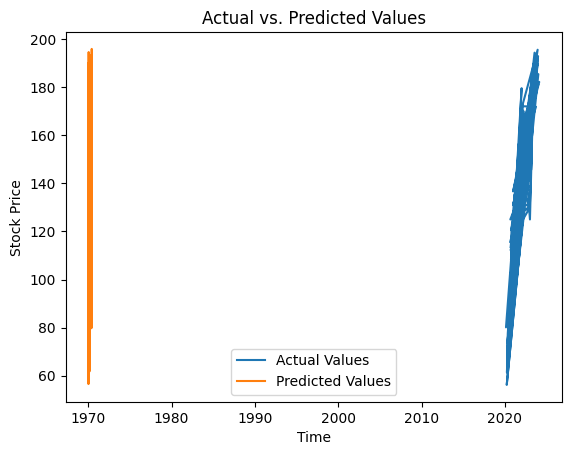

In [41]:
# Line plot

plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

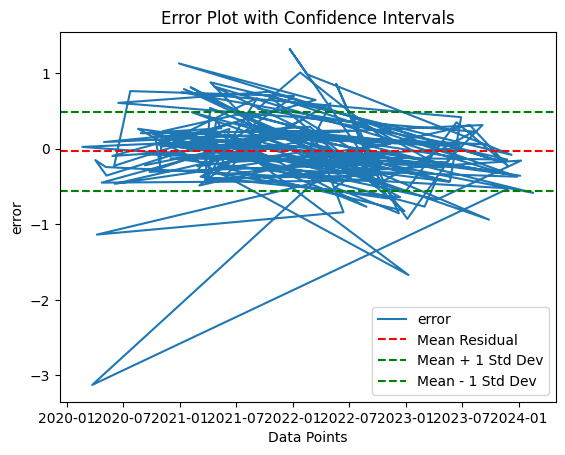

In [52]:
# Error plot
error = y_test - ensemble_predictions

mean_residual = np.mean(error)
std_residual = np.std(error)

plt.plot(error, label='error')
plt.axhline(y=mean_residual, color='r', linestyle='--', label='Mean Residual')
plt.axhline(y=mean_residual + std_residual, color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y=mean_residual - std_residual, color='g', linestyle='--', label='Mean - 1 Std Dev')
plt.xlabel('Data Points')
plt.ylabel('error')
plt.title('Error Plot with Confidence Intervals')
plt.legend()
plt.show()

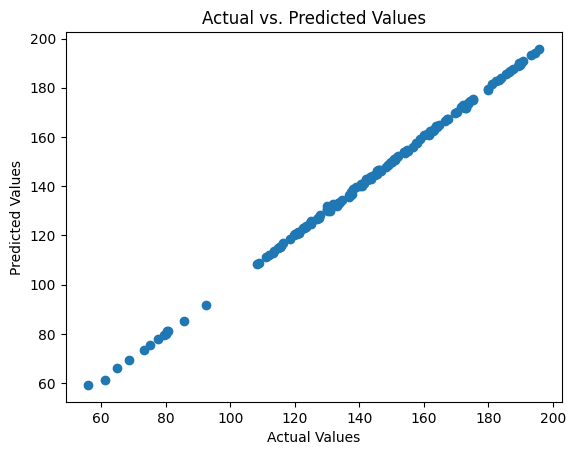

In [43]:
# Scatter plot

plt.scatter(y_test, ensemble_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

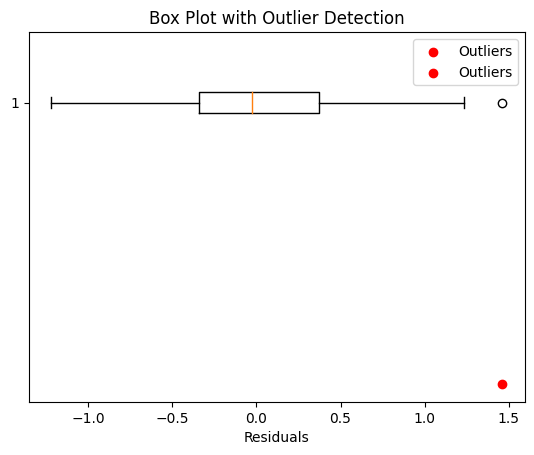

In [48]:
# visualize the distribution of errors and identify outliers. (boxplot)

residuals = y_test - predictions
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.boxplot(residuals, vert=False)
plt.scatter(residuals[residuals < lower_bound], [-1] * len(residuals[residuals < lower_bound]), color='r', label='Outliers')
plt.scatter(residuals[residuals > upper_bound], [-1] * len(residuals[residuals > upper_bound]), color='r', label='Outliers')
plt.xlabel('Residuals')
plt.ylabel('')
plt.title('Box Plot with Outlier Detection')
plt.legend()
plt.show()

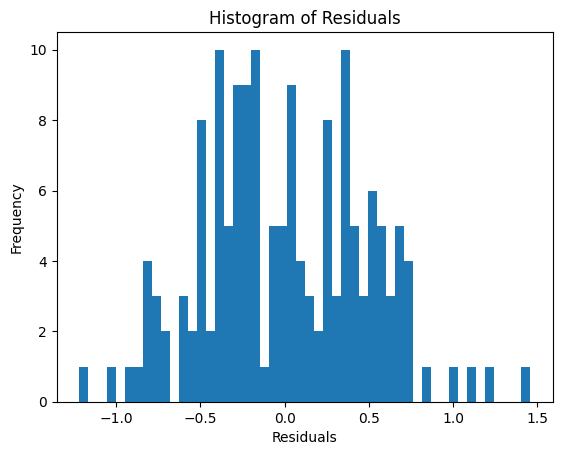

In [46]:
# Histogram of residuals

residuals = y_test - predictions
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# **HYPERPARAMETER TUNING**

In [54]:
# Hyper-parameter Tuning using Gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
# Change model to RandomForestRegressor
model = RandomForestRegressor() # initialize a RandomForestRegressor model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: -0.31


In [66]:
!pip install scikeras
!pip install --upgrade scikit-learn

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

param_grid = {'units': [50, 100, 200], 'epochs': [50, 100, 200], 'batch_size': [32, 64, 128]}

def create_model(units=50, epochs=50, batch_size=32):
# Create a Sequential model instance
 model = Sequential()
# add Long-Short Term Memory layer
 model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1))) # use units parameter
# add another LSTM layer (50 units)
 model.add(LSTM(units=units)) # use units parameter
# add a Dense Layer (1 output unit)
 model.add(Dense(1))
# We compile the model with the Adam optimizer and mean squared error loss function.
 model.compile(optimizer='adam', loss='mean_squared_error')
 return model

keras_model = KerasClassifier(model=create_model, units=50, epochs=50, batch_size=32) # use model instead of build_fn, set defaults for units, epochs, and batch_size

param_grid = {'model__units': [50, 100, 200], 'model__epochs': [50, 100, 200], 'model__batch_size': [32, 64, 128]} # use correct parameters with model__ prefix
random_search = RandomizedSearchCV(keras_model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error') # Changed to RandomizedSearchCV
random_search.fit(X_train, y_train)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_:.2f}')

ImportError: cannot import name '_get_container_adapter' from 'sklearn.utils._set_output' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py)